In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv("F:\Projekte\DataScience\SteamScrapingAndAnalysis\SteamData.csv", encoding='utf-16')

In [3]:
games

,Name,Release date,Genre 1,Genre 2,Rating,Rating count,Min OS,Min Processor,Min Graphics,Min Graphics NVIDIA,Min Graphics AMD,Min Memory,Min Storage,Rec OS,Rec Processor,Rec Graphics,Rec Graphics NVIDIA,Rec Graphics AMD,Rec Memory,Rec Storage
0,Hunt: Showdown,"27 Aug, 2019",Action,NaN,9.0,115043.0,Windows 10 64 bit,Intel i5-4590 @ 3.3GHz (4th Generation) or AMD...,NVIDIA GeForce GTX 660 TI or AMD Radeon R7 370...,GeForce GTX 660,NaN,8 GB RAM,36 GB available space,Windows 10 64 bit,Intel i5-6600 @ 3.3Ghz (6th Generation) or AMD...,"NVIDIA GeForce GTX 970 or AMD Radeon R9 390X, ...",GeForce GTX 970,NaN,12 GB RAM,36 GB available space
1,Lost Ark,"11 Feb, 2022",Action,Adventure,7.0,183184.0,Windows 10 (64-bit only),Intel i3 or AMD Ryzen 3,NVIDIA GeForce GTX 460 / AMD HD6850,GeForce GTX 460,NaN,8 GB RAM,50 GB available space,Windows 10 (64-bit only),Intel i5 or AMD Ryzen 5,NVIDIA GeForce GTX 1050,GeForce GTX 1050,NaN,16 GB RAM,50 GB available space
2,Counter-Strike: Global Offensive,"21 Aug, 2012",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Steam Deck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,High On Life,"13 Dec, 2022",Action,Adventure,9.0,557.0,Windows 10 64-bit,Intel(R) Core(TM) i5-4430K CPU @ 3.00GHz (4 CPUs),NVIDIA GeForce GTX 1060 (3GB)/AMD Radeon R9 29...,GeForce GTX 1060,NaN,8 GB RAM,50 GB available space,Windows 10 64-bit,Intel(R) Core(TM) i5-6402p CPU @ 2.80GHz (4 CP...,NVIDIA GeForce RTX 2060 (6GB)/AMD RX 5600 XT (...,GeForce RTX 2060,RX 5600 XT,8 GB RAM,50 GB available space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,Aurelia: Stellar Arising,"16 May, 2022",Action,Adventure,0.0,4.0,Windows 7+,Intel Core i5 2.6Ghz,NaN,NaN,NaN,4000 MB RAM,2500 MB available space,Windows 7+,Intel Core i5 3.5Ghz,NaN,NaN,NaN,8000 MB RAM,5000 MB available space
6396,Crown of Pain Soundtrack,"15 Feb, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6397,Boomerang Fu - Fresh Flavors Pack,"16 Nov, 2021",Action,Casual,8.0,19.0,Windows 7+,"Intel Core i5-5257U, AMD Ryzen 3 1200 or equiv...","GeForce GTX 1050, AMD RX 460 or equivalent",GeForce GTX 1050,RX 460,8 GB RAM,1 GB available space,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Dead Link: Pages Torn,"17 Nov, 2017",Adventure,Casual,6.0,14.0,"Windows 7,8,10","Intel, AMD","NVIDIA, AMD GPU",NaN,NaN,2 GB RAM,2 GB available space,Windows 10,"Intel, AMD","NVIDIA, AMD GPU",NaN,NaN,2 GB RAM,2 GB available space


In [5]:
games.columns

Index(['Name', 'Release date', 'Genre 1', 'Genre 2', 'Rating', 'Rating count',
       'Min OS', 'Min Processor', 'Min Graphics', 'Min Graphics NVIDIA',
       'Min Graphics AMD', 'Min Memory', 'Min Storage', 'Rec OS',
       'Rec Processor', 'Rec Graphics', 'Rec Graphics NVIDIA',
       'Rec Graphics AMD', 'Rec Memory', 'Rec Storage'],
      dtype='object')

In [6]:
games.dtypes

Name                    object
Release date            object
Genre 1                 object
Genre 2                 object
Rating                 float64
Rating count           float64
Min OS                  object
Min Processor           object
Min Graphics            object
Min Graphics NVIDIA     object
Min Graphics AMD        object
Min Memory              object
Min Storage             object
Rec OS                  object
Rec Processor           object
Rec Graphics            object
Rec Graphics NVIDIA     object
Rec Graphics AMD        object
Rec Memory              object
Rec Storage             object
dtype: object

In [7]:
games["Release date"] = pd.to_datetime(games["Release date"])

In [9]:
games.head()

,Name,Release date,Genre 1,Genre 2,Rating,Rating count,Min OS,Min Processor,Min Graphics,Min Graphics NVIDIA,Min Graphics AMD,Min Memory,Min Storage,Rec OS,Rec Processor,Rec Graphics,Rec Graphics NVIDIA,Rec Graphics AMD,Rec Memory,Rec Storage
0,Call of Duty®: Modern Warfare® II,2022-10-27,Action,NaN,6.0,134415.0,Windows® 10 64 Bit (latest update),Intel® Core™ i3-6100 / Core™ i5-2500K or AMD R...,NVIDIA® GeForce® GTX 960 or AMD Radeon™ RX 470...,GeForce GTX 960,RX 470,8 GB RAM,125 GB available space,Windows® 10 64 Bit (latest update) or Windows®...,Intel® Core™ i5-6600K / Core™ i7-4770 or AMD R...,NVIDIA® GeForce® GTX 1060 or AMD Radeon™ RX 58...,GeForce GTX 1060,RX 580,12 GB RAM,125 GB available space
1,"Warhammer 40,000: Darktide",2022-11-30,Action,Adventure,6.0,30899.0,Windows 10 (64 bit) / Windows 11 (64 bit),Intel i5-6600 (3.30GHz) OR AMD Ryzen 2400G (3....,NVIDIA GeForce GTX 970 OR AMD Radeon RX 570,GeForce GTX 970,Radeon RX 570,8 GB RAM,50 GB available space,Windows 10 (64 bit) / Windows 11 (64 bit),Intel i7-9700K (3.70GHz) OR AMD Ryzen 5 3600 (...,NVIDIA GeForce RTX 3060 / RTX 2060 OR AMD Rade...,GeForce RTX 3060,Radeon RX 5700 XT,16 GB RAM,50 GB available space
2,Need for Speed™ Unbound,2022-12-01,Action,Racing,7.0,2339.0,Windows 10 64-bit,"Ryzen 5 2600, Core i5-8600","RX 570, GTX 1050 Ti",GeForce GTX 1050 Ti,RX 570,8 GB RAM,50 GB available space,Windows 10 64-bit,"Ryzen 5 3600, Core i7-8700","Radeon RX5700 (8GB), GeForce RTX 2070 (8GB)",GeForce RTX 2070,Radeon RX5700,16 GB RAM,50 GB available space
3,The Callisto Protocol™,2022-12-01,Action,Adventure,6.0,11666.0,Windows 10/11,Intel® Core™ i5-8400 or AMD Ryzen™ 5 2600,NVIDIA® GeForce® GTX 1060 or AMD Radeon™ RX 580,GeForce GTX 1060,RX 580,8 GB RAM,75 GB available space,Windows 10/11,Intel® Core™ i7-8700 or AMD Ryzen™ 5 3600,NVIDIA® GeForce® GTX 1070 or AMD Radeon™ RX 5700,GeForce GTX 1070,RX 5700,16 GB RAM,75 GB available space
4,Lost Ark,2022-02-11,Action,Adventure,7.0,182734.0,Windows 10 (64-bit only),Intel i3 or AMD Ryzen 3,NVIDIA GeForce GTX 460 / AMD HD6850,GeForce GTX 460,NaN,8 GB RAM,50 GB available space,Windows 10 (64-bit only),Intel i5 or AMD Ryzen 5,NVIDIA GeForce GTX 1050,GeForce GTX 1050,NaN,16 GB RAM,50 GB available space


In [5]:
games.describe(include="all")

,Name,Release date,Genre 1,Genre 2,Rating,Rating count,Min OS,Min Processor,Min Graphics,Min Graphics NVIDIA,Min Graphics AMD,Min Memory,Min Storage,Rec OS,Rec Processor,Rec Graphics,Rec Graphics NVIDIA,Rec Graphics AMD,Rec Memory,Rec Storage
count,1380,1376,1378,1089,1366.000000,1.366000e+03,1362,1334,1274,716,175,1342,1216,1250,1239,1200,926,399,1242,1103
unique,1380,856,12,12,NaN,NaN,563,856,908,51,32,55,129,458,802,826,67,52,49,123
top,Call of Duty®: Modern Warfare® II,"29 Nov, 2022",Action,Adventure,NaN,NaN,Windows 10,Dual core CPU 2.4 GHz,GeForce GTS 450-class (Intel HD 4000),GeForce GTX 660,RX 470,8 GB RAM,2 GB available space,Windows 10,Quad core CPU 3.0 GHz,GeForce GTX 760-class (2 GB),GeForce GTX 1060,Radeon RX 580,8 GB RAM,10 GB available space
freq,1,13,669,327,NaN,NaN,110,34,34,123,20,498,76,201,34,34,180,64,491,74
mean,NaN,NaN,NaN,NaN,8.002196,2.853519e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.662998,1.007949e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,7.000000,4.820000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,9.000000,3.422500e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,9.000000,1.822275e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
games[games["Rating"] == 10]

,Name,Release date,Genre 1,Genre 2,Rating,Rating count,Min OS,Min Processor,Min Graphics,Min Graphics NVIDIA,Min Graphics AMD,Min Memory,Min Storage,Rec OS,Rec Processor,Rec Graphics,Rec Graphics NVIDIA,Rec Graphics AMD,Rec Memory,Rec Storage
12,Euro Truck Simulator 2,"18 Oct, 2012",Indie,Simulation,10.0,430692.0,Windows 7,Dual core CPU 2.4 GHz,GeForce GTS 450-class (Intel HD 4000),NaN,NaN,4 GB RAM,NaN,Windows 7/8.1/10 64-bit,Quad core CPU 3.0 GHz,GeForce GTX 760-class (2 GB),GeForce GTX 760,NaN,6 GB RAM,NaN
25,Cosmoteer: Starship Architect & Commander,"24 Oct, 2022",Simulation,Strategy,10.0,4493.0,32-bit or 64-bit Microsoft Windows 7 (Service ...,Dual-core Intel 2.0 GHz (or AMD equivalent),1GB DirectX 9 Graphics Card or better,NaN,NaN,4 GB RAM,2 GB available space,64-bit Microsoft Windows 7 (Service Pack 1 req...,Quad-core Intel 2.5 GHz (or AMD equivalent) or...,2GB DirectX 11 Graphics Card or better,NaN,NaN,8 GB RAM,2 GB available space
34,American Truck Simulator,"2 Feb, 2016",Indie,Simulation,10.0,93251.0,Windows 7 64-bit,Dual core CPU 2.4 GHz,GeForce GTS 450-class (Intel HD 4000),NaN,NaN,4 GB RAM,7 GB available space,Windows 7/8.1/10 64-bit,Quad core CPU 3.0 GHz,GeForce GTX 760-class (2 GB),GeForce GTX 760,NaN,6 GB RAM,7 GB available space
52,Valheim,"2 Feb, 2021",Action,Adventure,10.0,320252.0,Windows 7 or later,2.6 GHz Quad Core or similar,GeForce GTX 950 or Radeon HD 7970,GeForce GTX 950,NaN,8 GB RAM,1 GB available space,Windows 7 or later,i5 3GHz or Ryzen 5 3GHz,GeForce GTX 1060 or Radeon RX 580,GeForce GTX 1060,Radeon RX 580,16 GB RAM,1 GB available space
58,The Forest,"30 Apr, 2018",Action,Adventure,10.0,362629.0,Windows 7,Intel Dual-Core 2.4 GHz,NVIDIA GeForce 8800GT,NaN,NaN,4 GB RAM,5 GB available space,Windows 7,Quad Core Processor,NVIDIA GeForce GTX 560,GeForce GTX 560,NaN,4 GB RAM,5 GB available space
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,Assetto Corsa - Dream Pack 1,"11 Mar, 2015",Indie,Racing,10.0,574.0,Windows Vista Sp2 - 7 - 8 - 8.1,"AMD Athlon X2 2.8 GHZ, Intel Core 2 Duo 2.4 GHZ","DirectX 10.1 (e.g. AMD Radeon HD 6450, Nvidia ...",NaN,NaN,2 GB RAM,5 GB available space,Windows Vista Sp2 - 7 - 8 - 8.1,"AMD Six-Core CPU, Intel Quad-Core CPU","DirectX 11 (e.g. AMD Radeon 290x, Nvidia GeFor...",GeForce GTX 970,NaN,6 GB RAM,5 GB available space
1347,Roadwarden,"12 Sep, 2022",Adventure,Indie,10.0,810.0,Windows 10/7/8/8.1/XP/Vista (32 or 64 bit),2.4ghz Intel Core 2 Duo or equivalent,Nvidia 260 GTS or Radeon HD 4850 - 512 MB of V...,NaN,NaN,2 GB RAM,2 GB available space,Windows 10/7/8/8.1 (64bit),2.66GHz Intel Core i7,Nvidia 460 GTX / Radeon 5770 - 1 GB of VRAM or...,NaN,NaN,4 GB RAM,2 GB available space
1348,SpaceEngine,"11 Jun, 2019",Casual,Indie,10.0,6463.0,Windows 10,Intel Core i3-3220T or AMD FX-4100,GeForce GTX 1050 Ti or Radeon R9 380 (4 GB),GeForce GTX 1050 Ti,NaN,6 GB RAM,4 GB available space,Windows 10,Intel Core i5-4430 or AMD FX-8350,GeForce GTX 1060 (5/6 GB) or Radeon RX 480 (8 GB),GeForce GTX 1060,Radeon RX 480,8 GB RAM,50 GB available space
1354,Ori and the Blind Forest,"11 Mar, 2015",Action,NaN,10.0,41959.0,Windows 7,Intel Core 2 Duo E4500 @ 2.2GHz or AMD Athlon ...,GeForce 240 GT or Radeon HD 6570 – 1024 MB (1 ...,NaN,NaN,4 GB RAM,8 GB available space,Windows 7,Intel Core i5 2300 or AMD FX6120,GeForce GTX 550 Ti or Radeon HD 6770,GeForce GTX 550 Ti,NaN,4 GB RAM,8 GB available space


<AxesSubplot:>

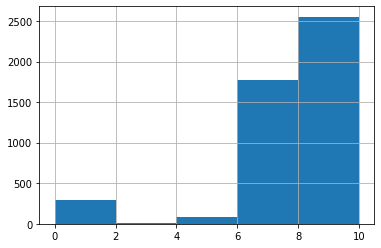

In [4]:
games["Rating"].hist(bins=5)

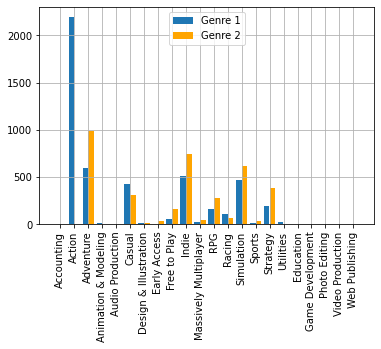

In [5]:
titlesPerGenre1 = games.groupby(by="Genre 1").count()["Name"]
titlesPerGenre2 = games.groupby(by="Genre 2").count()["Name"]

genres = pd.DataFrame(index=["Genre 1", "Genre 2"], data=[titlesPerGenre1, titlesPerGenre2])

X = np.arange(len(genres.columns))
plt.xticks(ticks=X, labels=genres.columns, rotation=90)
plt.grid()
plt.bar(X-0.21, genres.loc["Genre 1"], width=.4)
plt.bar(X+0.21, genres.loc["Genre 2"], color="orange", width=.4)
plt.legend(["Genre 1", "Genre 2"])

,Action,Adventure,Casual,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Utilities,Early Access
Genre 1,8.051672,8.444444,7.804348,7.200000,8.568000,8.375000,7.759259,7.954545,7.185430,9.000000,7.985915,8.2,NaN
Genre 2,NaN,8.122642,8.641791,7.333333,8.559322,6.782609,8.338235,8.578947,8.020942,6.846154,7.614173,9.0,8.333333


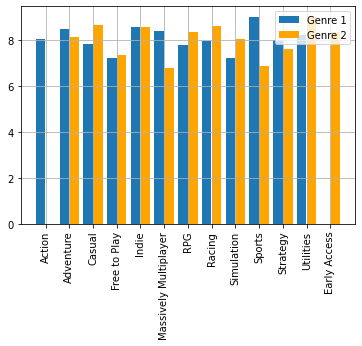

In [9]:
ratingsAvgPerGenre1 = games.groupby(by="Genre 1").mean()["Rating"]
ratingsAvgPerGenre2 = games.groupby(by="Genre 2").mean()["Rating"]

genreRatings = pd.DataFrame(index=["Genre 1", "Genre 2"], data=[ratingsAvgPerGenre1, ratingsAvgPerGenre2])

X = np.arange(len(genres.columns))
plt.xticks(ticks=X, labels=genres.columns, rotation=90)
plt.grid()
plt.bar(X-0.21, genreRatings.loc["Genre 1"], width=.4)
plt.bar(X+0.21, genreRatings.loc["Genre 2"], color="orange", width=.4)
plt.legend(["Genre 1", "Genre 2"])

genreRatings

In [11]:
performances = pd.read_csv("F:\\Projekte\\DataScience\\SteamScraping\\NvidiaGPUs.csv")
performances = performances.set_index("Card")
performances

,Performance
Card,
GeForce RTX 3090 Ti,10.000000
GeForce RTX 4090,10.000000
GeForce RTX 3090,9.580205
GeForce RTX 4080 Ti,9.342569
GeForce RTX 3080 Ti,9.191126
...,...
GeForce GTX 675MX,1.050128
GeForce MX150,1.038448
GeForce GTX 460,1.030904


In [12]:
gamesAndPerformances = games.join(performances, on="Rec Graphics NVIDIA")

<AxesSubplot:>

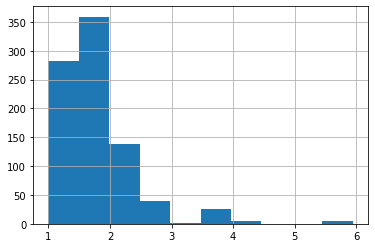

In [13]:
gamesAndPerformances["Performance"].hist()